# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
app_train ["CNT_CHILDREN"].replace(0,"type1").replace([1,2],"type2").replace([3,4,5],"type3").replace([ 'i' in range(100)],"type4")


0         type1
1         type1
2         type1
3         type1
4         type1
5         type1
6         type2
7         type1
8         type1
9         type1
10        type2
11        type1
12        type1
13        type2
14        type1
15        type1
16        type1
17        type2
18        type1
19        type2
20        type1
21        type2
22        type2
23        type1
24        type2
25        type1
26        type1
27        type2
28        type1
29        type1
          ...  
307481    type1
307482    type1
307483    type1
307484    type1
307485    type2
307486    type2
307487    type1
307488    type1
307489    type1
307490    type1
307491    type2
307492    type1
307493    type1
307494    type2
307495    type1
307496    type1
307497    type1
307498    type1
307499    type1
307500    type1
307501    type3
307502    type2
307503    type1
307504    type1
307505    type1
307506    type1
307507    type1
307508    type1
307509    type1
307510    type1
Name: CNT_CHILDREN, Leng

# 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 boxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [46]:
#1
"""
Your code here
"""
app_train ["CNT_CHILDREN_GROUP"] = app_train ["CNT_CHILDREN"].replace(0,"type1").replace([1,2],"type2").replace([3,4,5],"type3").replace([range(100)],"type4")
#app_train ["CNT_CHILDREN"].value_counts()
#app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

type1    215371
type2     87868
type3      4230
type4        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [50]:
print(len(app_train ["CNT_CHILDREN_GROUP"]))

307511


In [52]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP', 'TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
type1               0         166747.010980
                    1         160804.210548
type2               0         174590.584401
                    1         176115.362720
type3               0         175053.742913
                    1         160677.385714
type4               0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [62]:
grouped_df.head()

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
5          99000.0
6         171000.0
10        112500.0
13        225000.0
17         81000.0
19         90000.0
26        112500.0
40        202500.0
42        135000.0
81         81000.0
91        171000.0
92        135000.0
110       157500.0
144        58500.0
180       180000.0
182       225000.0
184       202500.0
246       121500.0
255       225000.0
261       112500.0
365        54000.0
2369      157500.0
2666       45000.0
3011      180000.0
3045      135000.0
3079       85500.0
7204      157500.0
12615     112500.0
17516     315000.0
23881     180000.0
25669     157500.0
34545     315000.0
72070      90000.0
76087     135000.0
140914    112500.0
Name: AMT_INCOME_TOTAL, dtype: float64

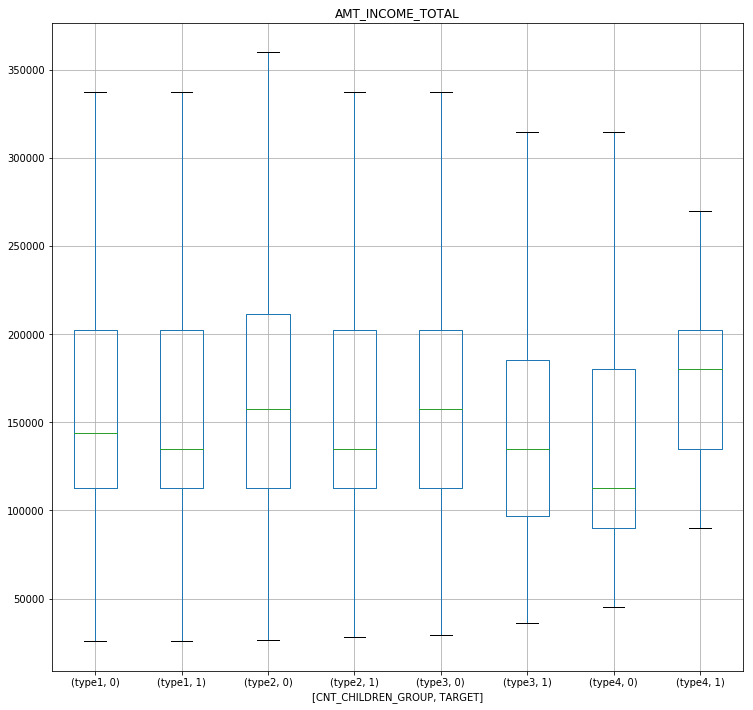

In [57]:
#2-2
"""
Your code here
"""
plt_column = 'AMT_INCOME_TOTAL'
plt_by = ['CNT_CHILDREN_GROUP','TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [63]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:(x - np.mean(x)) / (np.std(x)))

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491536
1,270000.0,0.972437
2,67500.0,-0.934708
3,135000.0,-0.298993
4,121500.0,-0.426136
